Human Activity Recognition

Given a new datapoint we have to predict the Activity

In [1]:
# Obtain the  train data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [2]:
train.shape

(7352, 563)

In [3]:
# Obtain the  test data 
test = pd.read_csv("test.csv")

In [4]:
test.shape

(2947, 563)

# Data Cleaning

## 1. Check for Duplicates

In [5]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


As we can see there are no duplicates in the train and test dataset

## 2. Checking for NaN/null values

In [6]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In this this dataset we should not be worried about null values because there are no null values   

## 3. Check for data imbalance

In [7]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

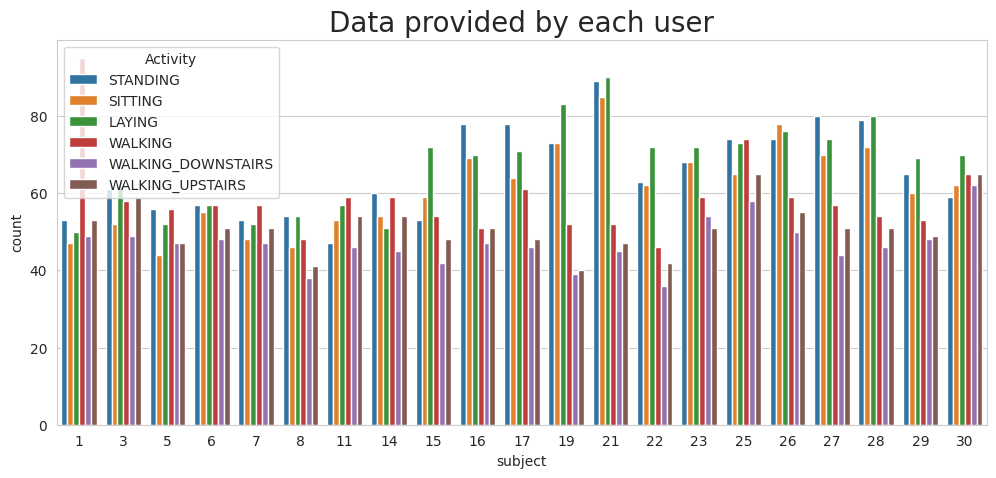

In [8]:
plt.figure(figsize=(12,5))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

As we can see We have got almost same number of reading from all the subjects means there are not significant difference in reading then we should not worry about it

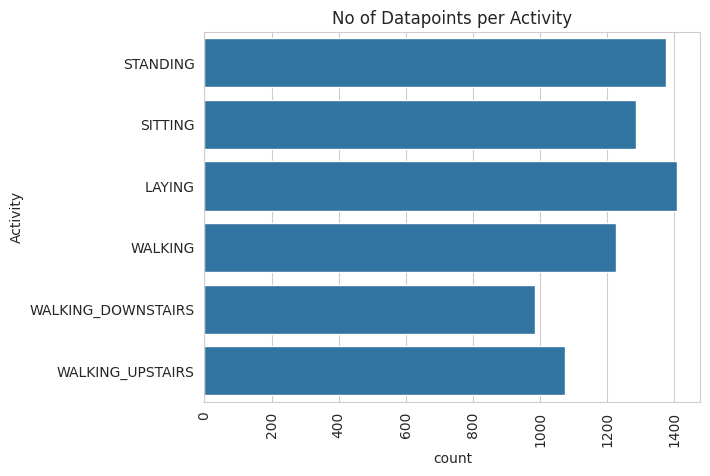

In [9]:
plt.title('No of Datapoints per Activity', fontsize=12)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

### Observation
Our data is well balanced (almost)

## 4. Changing feature names 

we will remove the commas and brackets to out features so that we can apply directly

In [10]:
columns = train.columns

# Removing '()', '-', and ',' from column names
columns = columns.str.replace('[()]', '', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]', '', regex=True)

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

## 5. Save this dataframe in a csv files

save our data to csv file for future prediction ,we will use these files when we will do predictions in the next notebook

In [11]:
train.to_csv('f_train.csv', index=False)
test.to_csv('f_test.csv', index=False)

In [12]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

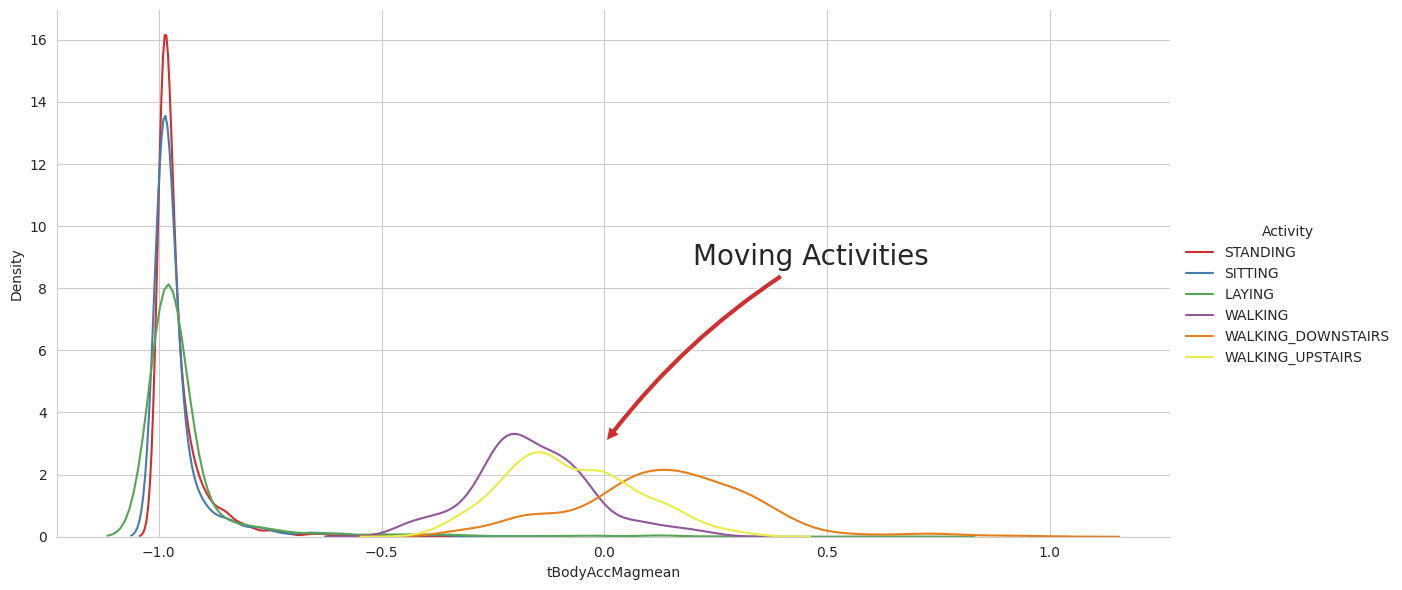

In [13]:
sns.set_palette("Set1", desat=0.80)

# Update the 'size' parameter to 'height'
facetgrid = sns.FacetGrid(train, hue='Activity', height=6, aspect=2)

# Replace sns.distplot with sns.kdeplot for smooth distribution plots
facetgrid.map(sns.kdeplot, 'tBodyAccMagmean', fill=False).add_legend()

# Annotations
plt.annotate("Stationary Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.show()


As we can clearly see the difference between stationary activities and Moving Activities

as per above pdf distribution we can look closer by dividing these pdfs 

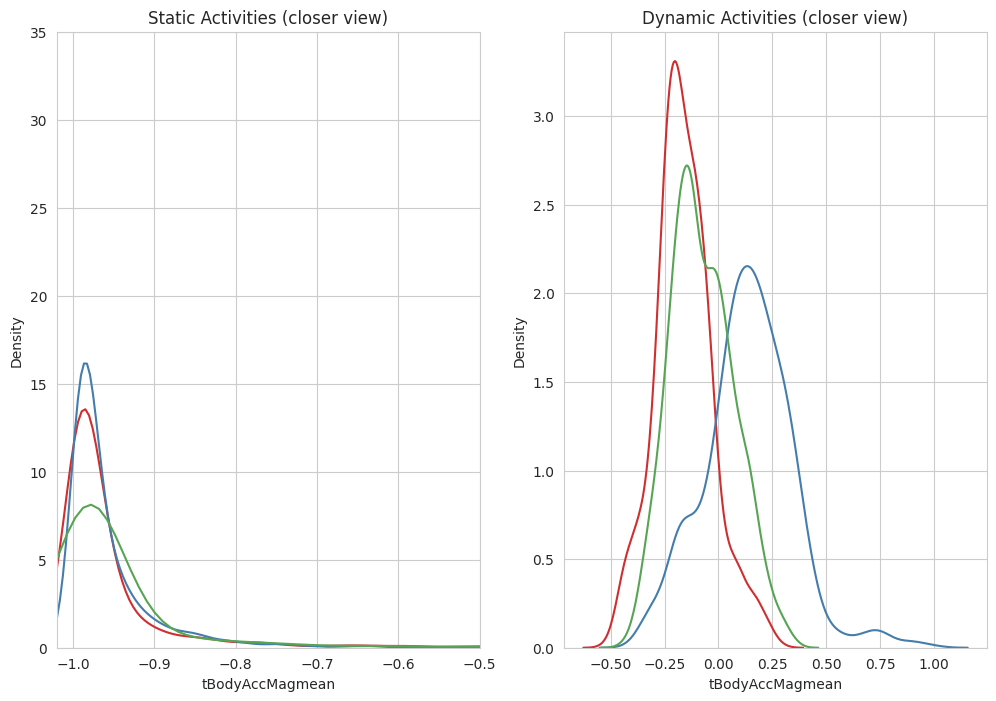

In [14]:
# Creating separate dataframes for each activity
df1 = train[train['Activity'] == "SITTING"]
df2 = train[train['Activity'] == "STANDING"]
df3 = train[train['Activity'] == "LAYING"]
df4 = train[train['Activity'] == "WALKING"]
df5 = train[train['Activity'] == "WALKING_DOWNSTAIRS"]
df6 = train[train['Activity'] == "WALKING_UPSTAIRS"]

plt.figure(figsize=(12, 8))

# Plotting static activities
plt.subplot(1, 2, 1)
plt.title("Static Activities (closer view)")
sns.kdeplot(df1['tBodyAccMagmean'], label='Sitting', fill=False)
sns.kdeplot(df2['tBodyAccMagmean'], label='Standing', fill=False)
sns.kdeplot(df3['tBodyAccMagmean'], label='Laying', fill=False)
plt.axis([-1.02, -0.5, 0, 35])

# Plotting dynamic activities
plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (closer view)")
sns.kdeplot(df4['tBodyAccMagmean'], label='Walking', fill=False)
sns.kdeplot(df5['tBodyAccMagmean'], label='Walking Downstairs', fill=False)
sns.kdeplot(df6['tBodyAccMagmean'], label='Walking Upstairs', fill=False)

plt.show()

### 3. Magnitude of an acceleration can saperate it well

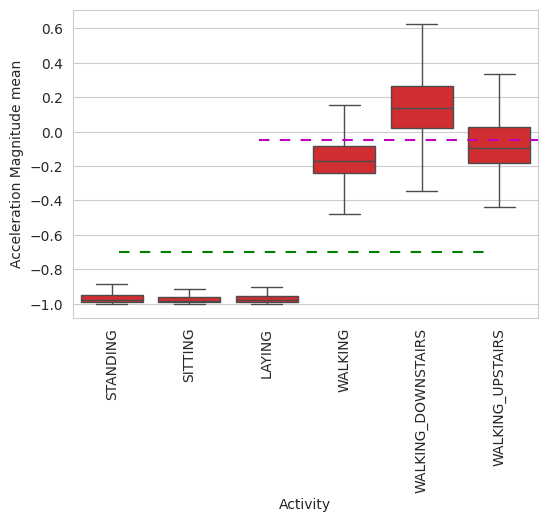

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Observations:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

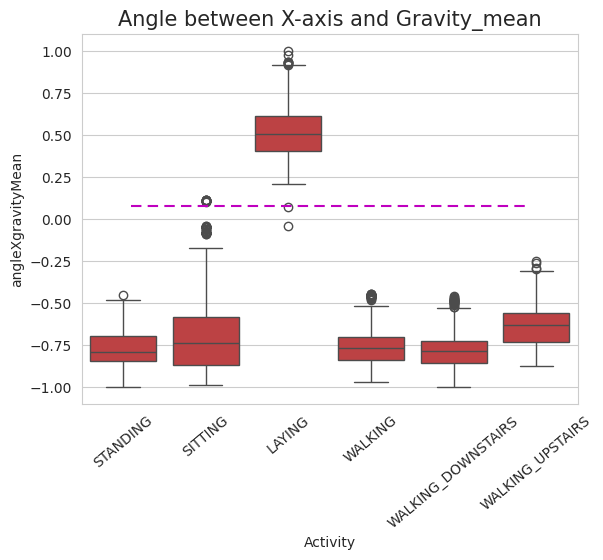

In [16]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

Observations:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

# Apply t-sne on the data 

In [17]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Here we will see these datapoints in 2 dimensions and try to observe the behaviour of the datapoints


Performing t-SNE with perplexity 5 and 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.041s...
[t-SNE] Computed neighbors for 7352 samples in 0.680s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.039s
[t-SNE] Iteration 50: error = 107.1659088, gradient norm = 0.0390660 (50 iterations in 1.565s)
[t-SNE] Iteration 100: error = 95.6923981, gradient norm = 0.0144228 (50 iterations in 1.06

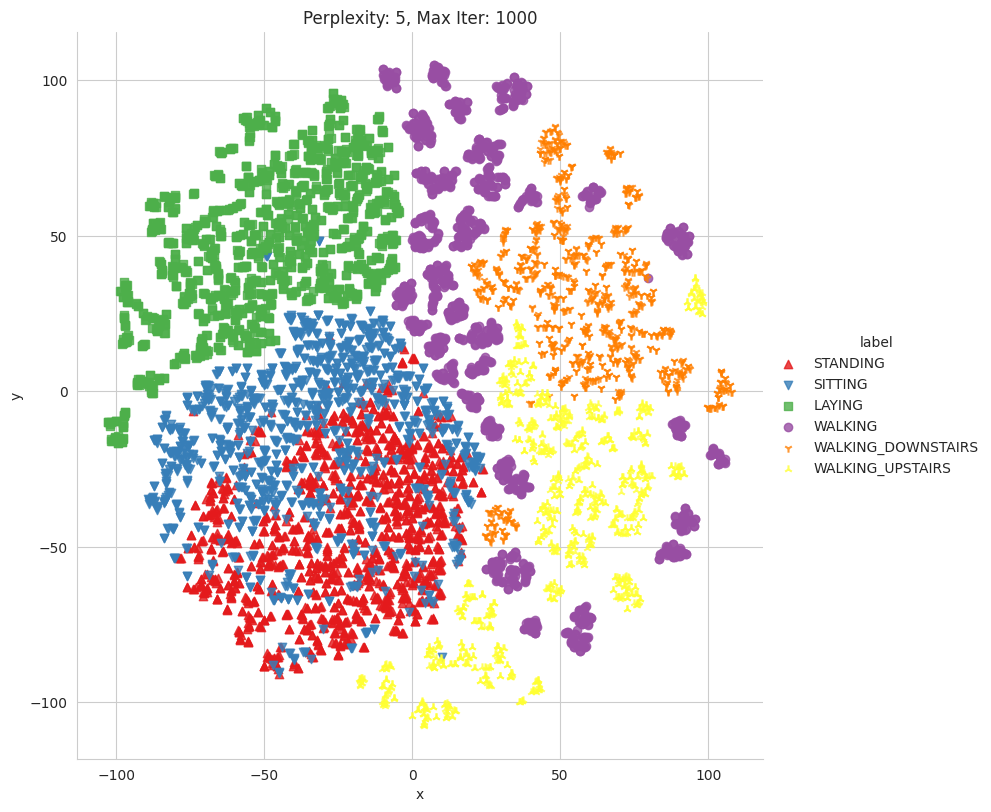

Done

Performing t-SNE with perplexity 10 and 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.028s...
[t-SNE] Computed neighbors for 7352 samples in 0.571s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 97.9111176, gradient norm = 0.0358830 (50 iterations in 1.840s)
[t-SNE] Iteration 100: error = 88.9369659, gradient norm = 0.0108847 (50 iterations in

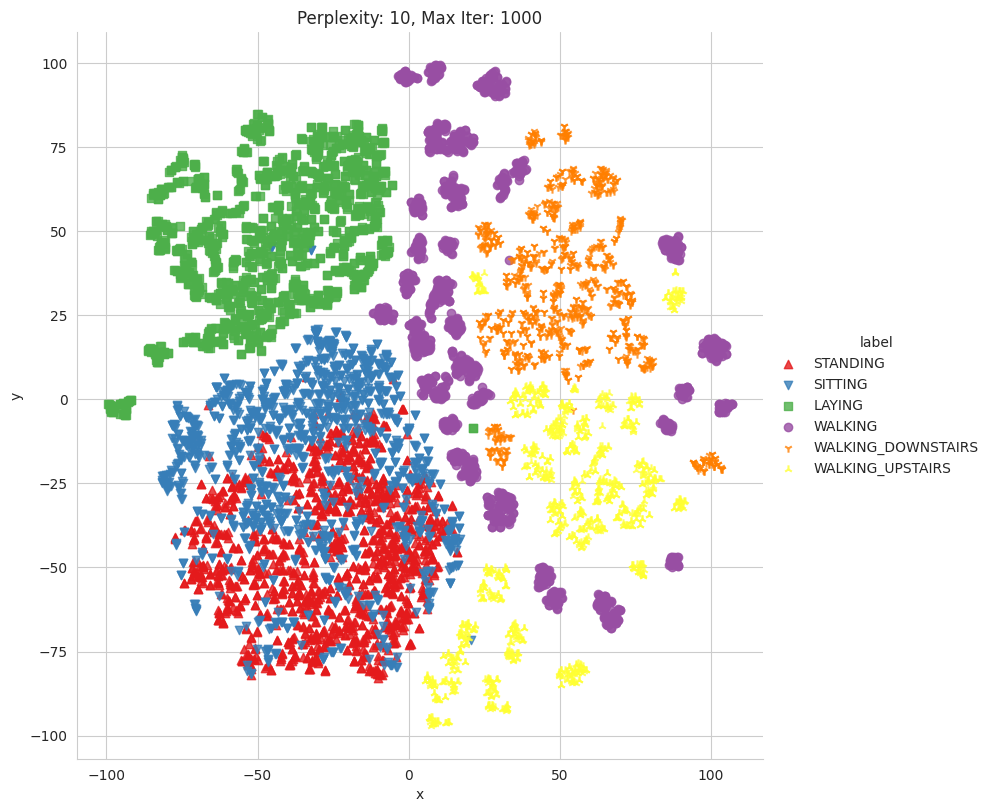

Done

Performing t-SNE with perplexity 20 and 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...
[t-SNE] Computed neighbors for 7352 samples in 0.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 89.2972565, gradient norm = 0.0303936 (50 iterations in 1.324s)
[t-SNE] Iteration 100: error = 82.9609146, gradient norm = 0.0078337 (50 iterations in

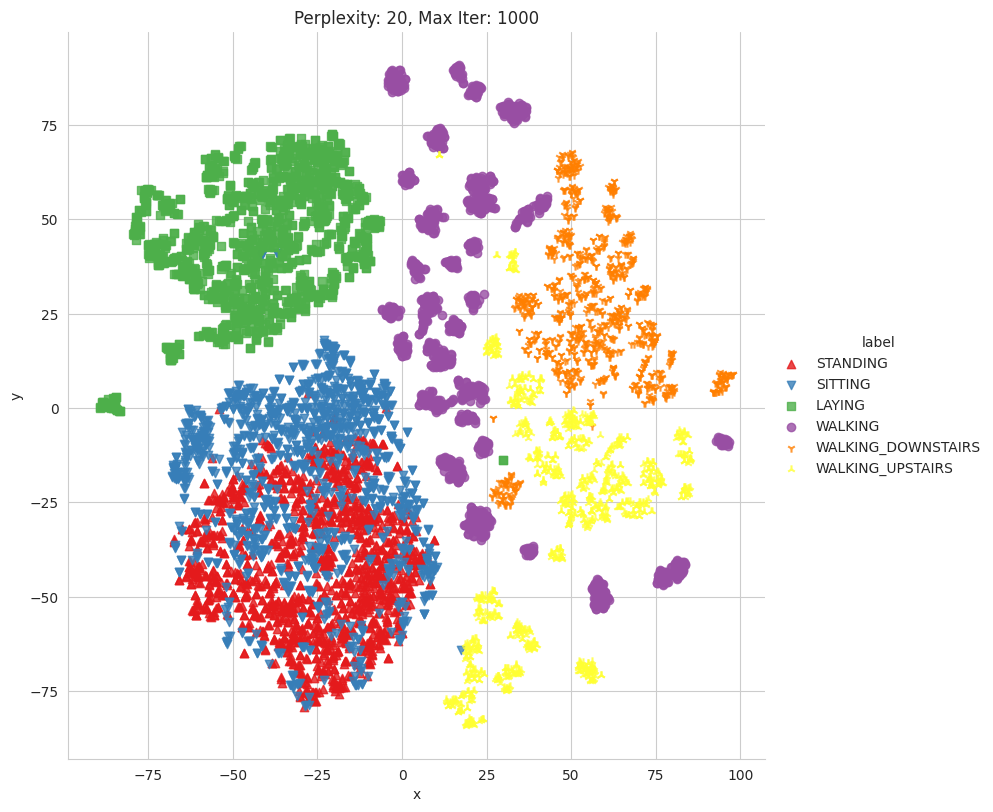

Done


In [18]:
# (t-Distributed Stochastic Neighbor Embedding) is a popular dimensionality reduction technique 
# used primarily for the visualization of high-dimensional data.
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        # Perform t-SNE
        print(f'\nPerforming t-SNE with perplexity {perplexity} and {n_iter} iterations at max')
        tsne = TSNE(verbose=2, perplexity=perplexity, n_iter=n_iter)
        X_reduced = tsne.fit_transform(X_data)
        print('Done..')
        
        # Prepare the data for seaborn
        print('Creating plot for this t-SNE visualization..')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})
        
        # Draw the plot
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title(f"Perplexity: {perplexity}, Max Iter: {n_iter}")
        img_name = f"{img_name_prefix}_perp_{perplexity}_iter_{n_iter}.png"
        print(f'Saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

# Prepare data for t-SNE
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']

# Perform t-SNE
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[5, 10, 20])

Conclusion

As we can see all the features except standing and sitting can be seperated very easily 
Model will probably be confused between standing and sitting

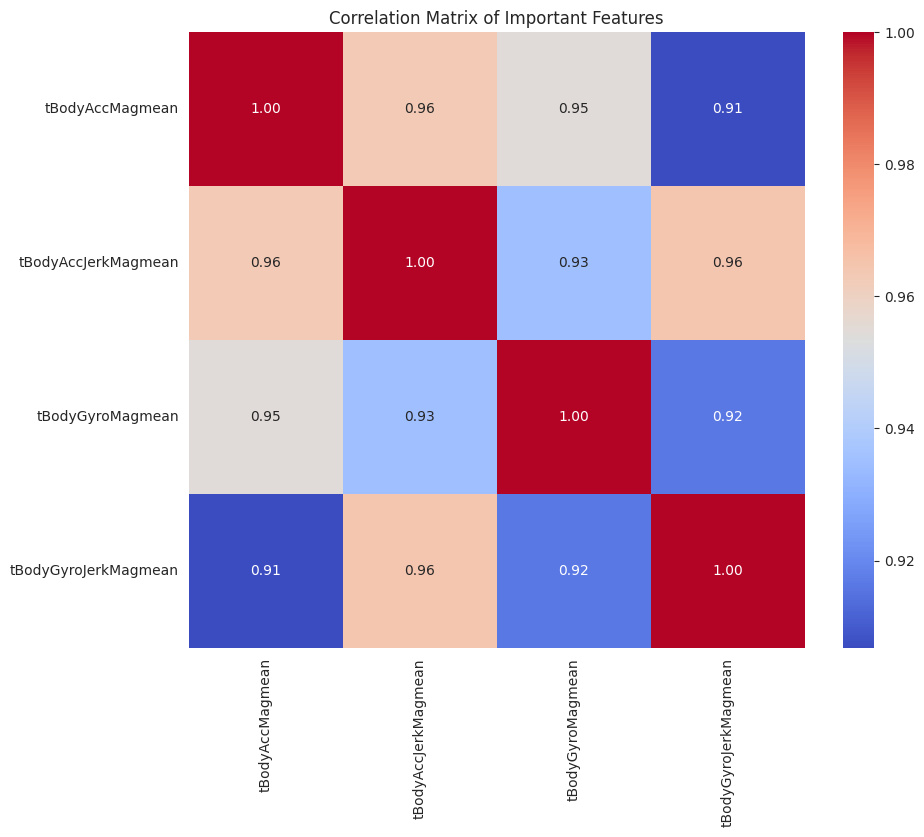

In [19]:
# Assuming 'train' is your DataFrame and you've selected important features
important_features = ['tBodyAccMagmean', 'tBodyAccJerkMagmean', 'tBodyGyroMagmean', 'tBodyGyroJerkMagmean']

# Compute the correlation matrix for the selected features
corr_matrix = train[important_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Important Features')
plt.show()

To implement ML models with GridsearchCV

In [20]:
train.Activity

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame
shuffled_df = train.sample(frac=1, random_state=42)
shuffled_df

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506,22,WALKING_DOWNSTAIRS
1446,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,...,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362,7,WALKING_DOWNSTAIRS
5995,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,...,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716,27,WALKING
4222,0.276116,-0.010909,-0.102886,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,...,-0.906098,-0.177275,-0.309304,0.176515,-0.143818,-0.625215,-0.106678,-0.147469,21,SITTING
6754,0.256382,0.000428,-0.113664,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,...,-0.316113,0.347143,0.590475,0.831084,0.465453,-0.860617,0.150598,-0.067109,29,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944,25,WALKING
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,...,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746,25,WALKING_DOWNSTAIRS
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939,25,WALKING
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270,5,STANDING


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Model Training (Label encoding of target variables, train test split, standardScalar for scaling the data)

In [23]:
# Encode the labels
label_encoder = LabelEncoder()
train['Activity'] = label_encoder.fit_transform(train['Activity'])
test['Activity'] = label_encoder.fit_transform(test['Activity'])

# Split the dataset into features and target variable
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Apply Various Models

RANDOM FOREST 

In [24]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.9267051238547676
Confusion Matrix:
 [[537   0   0   0   0   0]
 [  0 441  50   0   0   0]
 [  0  44 488   0   0   0]
 [  0   0   0 480   7   9]
 [  0   0   0  17 364  39]
 [  0   0   0  43   7 421]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.90      0.90       491
           2       0.91      0.92      0.91       532
           3       0.89      0.97      0.93       496
           4       0.96      0.87      0.91       420
           5       0.90      0.89      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947



Support Vector Machine (SVM)

In [25]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.9518154054971157
Confusion Matrix:
 [[537   0   0   0   0   0]
 [  3 441  46   0   0   1]
 [  0  29 503   0   0   0]
 [  0   0   0 482   8   6]
 [  0   0   0   6 386  28]
 [  0   0   0  14   1 456]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.94      0.90      0.92       491
           2       0.92      0.95      0.93       532
           3       0.96      0.97      0.97       496
           4       0.98      0.92      0.95       420
           5       0.93      0.97      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



K-Nearest Neighbors (KNN)

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.8836104513064132
Confusion Matrix:
 [[514  14   9   0   0   0]
 [  3 374 113   0   0   1]
 [  0  35 497   0   0   0]
 [  0   0   0 483   9   4]
 [  0   0   0  61 316  43]
 [  0   0   0  43   8 420]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       537
           1       0.88      0.76      0.82       491
           2       0.80      0.93      0.86       532
           3       0.82      0.97      0.89       496
           4       0.95      0.75      0.84       420
           5       0.90      0.89      0.89       471

    accuracy                           0.88      2947
   macro avg       0.89      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947



Logistic Regression

In [27]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.9545300305395318
Confusion Matrix:
 [[533   0   4   0   0   0]
 [  1 431  57   0   0   2]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   2   6 394  18]
 [  0   0   0  25   1 445]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       537
           1       0.97      0.88      0.92       491
           2       0.89      0.97      0.93       532
           3       0.94      0.99      0.97       496
           4       0.99      0.94      0.96       420
           5       0.96      0.94      0.95       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



C:\Users\Kunal Rane\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier:
Accuracy: 0.8622327790973872
Confusion Matrix:
 [[537   0   0   0   0   0]
 [  0 374 117   0   0   0]
 [  0  75 457   0   0   0]
 [  0   0   0 456  16  24]
 [  0   0   0  19 348  53]
 [  0   0   0  74  28 369]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.83      0.76      0.80       491
           2       0.80      0.86      0.83       532
           3       0.83      0.92      0.87       496
           4       0.89      0.83      0.86       420
           5       0.83      0.78      0.80       471

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



Evaluate the Models

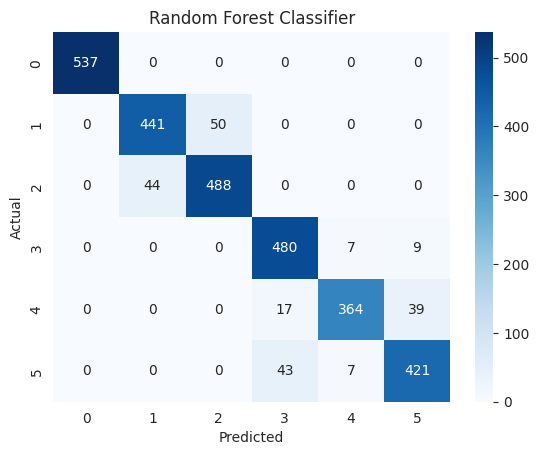

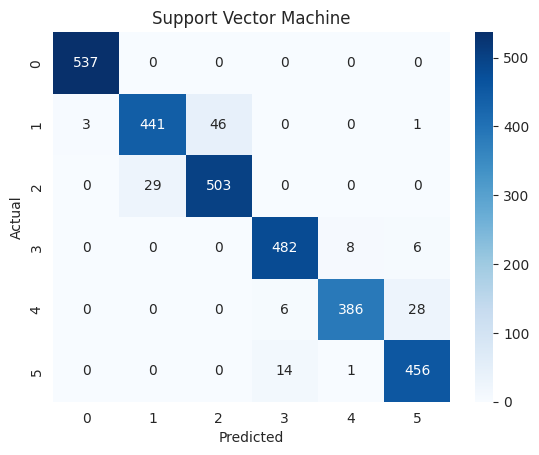

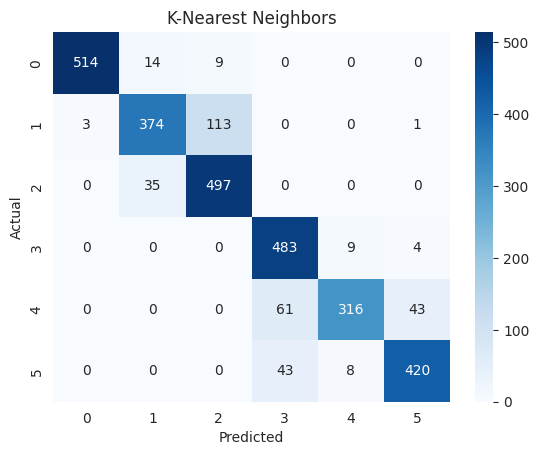

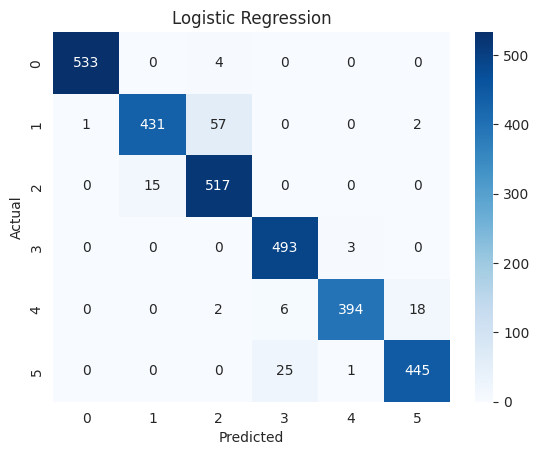

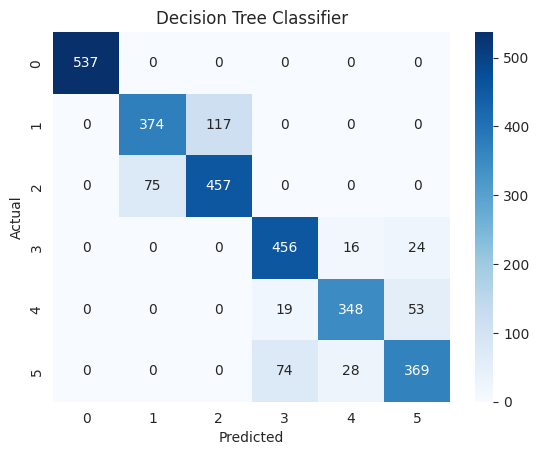

In [29]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Classifier")

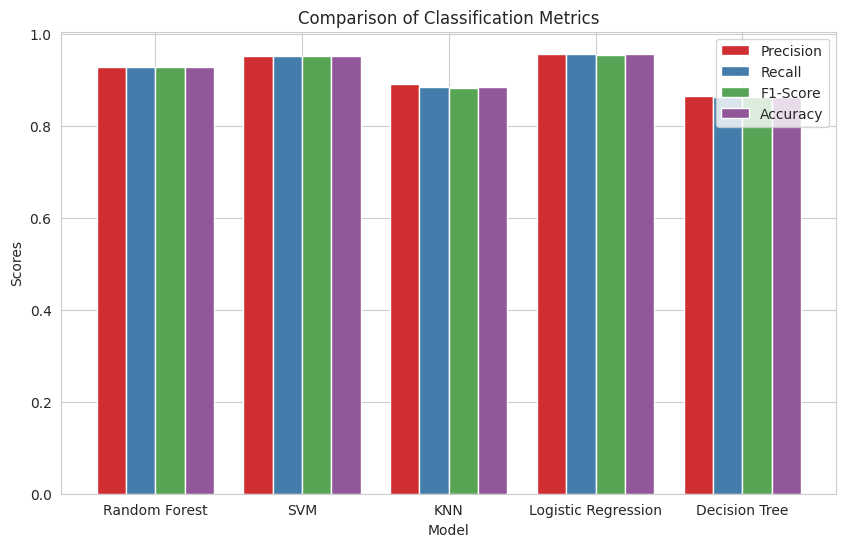

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_preds, model_names):
    # Collect all the metrics in one dictionary
    metrics_dict = {model_name: classification_report(y_true, y_pred, output_dict=True) 
                    for model_name, y_pred in zip(model_names, y_preds)}
    
    # Extracting precision, recall, and f1-score for the 'weighted avg' across classes
    precision = [metrics['weighted avg']['precision'] for metrics in metrics_dict.values()]
    recall = [metrics['weighted avg']['recall'] for metrics in metrics_dict.values()]
    f1_score = [metrics['weighted avg']['f1-score'] for metrics in metrics_dict.values()]
    accuracy = [metrics['accuracy'] for metrics in metrics_dict.values()]
    
    # Create a bar plot to compare these metrics
    x = np.arange(len(model_names))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(x - width*1.5, precision, width, label='Precision')
    ax.bar(x - width/2, recall, width, label='Recall')
    ax.bar(x + width/2, f1_score, width, label='F1-Score')
    ax.bar(x + width*1.5, accuracy, width, label='Accuracy')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Model')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Classification Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.show()

# Assuming you have these predictions and model names
y_preds = [y_pred_rf, y_pred_svm, y_pred_knn, y_pred_logreg, y_pred_dt]
model_names = ["Random Forest", "SVM", "KNN", "Logistic Regression", "Decision Tree"]

# Call the function
plot_classification_report(y_test, y_preds, model_names)

In [31]:
from sklearn.metrics import accuracy_score

def print_model_accuracies(y_true, y_preds, model_names):
    for model_name, y_pred in zip(model_names, y_preds):
        accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
        print(f"Accuracy for {model_name}: {accuracy:.2f}%")

# Assuming you have these predictions and model names
y_preds = [y_pred_rf, y_pred_svm, y_pred_knn, y_pred_logreg, y_pred_dt]
model_names = ["Random Forest", "SVM", "KNN", "Logistic Regression", "Decision Tree"]

# Call the function
print_model_accuracies(y_test, y_preds, model_names)

Accuracy for Random Forest: 92.67%
Accuracy for SVM: 95.18%
Accuracy for KNN: 88.36%
Accuracy for Logistic Regression: 95.45%
Accuracy for Decision Tree: 86.22%


 Fine-Tuning with GridSearchCV of Logistic Regression and SVM

In [32]:
# Parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto'],    # Kernel coefficient
    'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'penalty': ['l2', 'l1'],  # Used to specify the norm for the regularization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [33]:
# Best parameters and accuracy for SVM
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best accuracy for SVM:", grid_search_svm.best_score_)

# Best parameters and accuracy for Logistic Regression
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_logreg.best_score_)

Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy for SVM: 0.9368956284077192
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.9428801731433566


Ensemble Learning (Combining multiple models to create a more robust prediction can improve performance)

In [34]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('logreg', LogisticRegression()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))


C:\Users\Kunal Rane\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kunal Rane\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Stacking Classifier Accuracy: 0.9565659993213438
Confusion Matrix:
 [[537   0   0   0   0   0]
 [  1 445  44   0   0   1]
 [  0  12 520   0   0   0]
 [  0   0   0 491   3   2]
 [  0   0   0  11 384  25]
 [  0   0   0  27   2 442]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.91      0.94       491
           2       0.92      0.98      0.95       532
           3       0.93      0.99      0.96       496
           4       0.99      0.91      0.95       420
           5       0.94      0.94      0.94       471

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947



Recursive Feature Elimination (RFE) 
To enhance model performance by selecting the most significant features

In [35]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Initialize the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Initialize RFE with the Random Forest estimator and specify the number of features to select
# rfe = RFE(estimator=rf_model, n_features_to_select=10)

# # Fit RFE to the training data
# rfe.fit(X_train, y_train)

# # Transform the training and test data to only include the selected features
# X_train_rfe = rfe.transform(X_train)
# X_test_rfe = rfe.transform(X_test)

# # Train the Random Forest model on the selected features
# rf_model.fit(X_train_rfe, y_train)

# # Make predictions on the test data
# y_pred_rfe = rf_model.predict(X_test_rfe)

# # Evaluate the model's performance
# print("RFE with Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfe))

Reshape into 3D from 2D for LSTM model (3D: (samples, timesteps, features))

In [37]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [40]:
X_train.shape

(7352, 1, 561)

In [42]:
# If your labels are not already one-hot encoded 
# (which is needed for categorical_crossentropy loss), 
# you can convert them using to_categorical

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

C:\Users\Kunal Rane\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7745 - loss: 0.8529 - val_accuracy: 0.9301 - val_loss: 0.2751
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - loss: 0.1930 - val_accuracy: 0.9335 - val_loss: 0.1985
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9722 - loss: 0.1127 - val_accuracy: 0.9481 - val_loss: 0.1649
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0770 - val_accuracy: 0.9386 - val_loss: 0.1699
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0618 - val_accuracy: 0.9467 - val_loss: 0.1537
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0456 - val_accuracy: 0.9433 - val_loss: 0.1572
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9879 - loss: 0.0425 - val_accuracy: 0.9386 - val_loss: 0.1652
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.